# Transcript

In [ ]:
!pip install scikit-learn --upgrade

In [1]:
!pip list

Package             Version
------------------- ---------
argon2-cffi         20.1.0
async-generator     1.10
attrs               20.2.0
backcall            0.2.0
bleach              3.2.1
certifi             2020.6.20
cffi                1.14.3
colorama            0.4.3
cycler              0.10.0
decorator           4.4.2
defusedxml          0.6.0
entrypoints         0.3
importlib-metadata  2.0.0
ipykernel           5.3.4
ipython             7.18.1
ipython-genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
Jinja2              2.11.2
joblib              0.16.0
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.7
jupyter-console     6.2.0
jupyter-core        4.6.3
jupyterlab-pygments 0.1.2
kiwisolver          1.2.0
MarkupSafe          1.1.1
matplotlib          3.3.2
mistune             0.8.4
nbclient            0.5.0
nbconvert           6.0.6
nbformat            5.0.7
nest-asyncio        1.4.1
notebook            6.1.4
numpy               1.1

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.special import boxcox, inv_boxcox

% matplotlib inline

# read in the csv files
profile_amount = pd.read_csv('data/profile_amount.csv').drop(columns = 'user id')
profile_amount_offer = pd.read_csv('data/profile_amount_offer.csv').drop(columns = 'user id')

type_1 = pd.read_csv('data/amount_type_1.csv').drop(columns = 'user id')
type_2 = pd.read_csv('data/amount_type_2.csv').drop(columns = 'user id')
type_3 = pd.read_csv('data/amount_type_3.csv').drop(columns = 'user id')
type_no_offer = pd.read_csv('data/amount_no_offer.csv').drop(columns = 'user id')

In [4]:
type_1.head()

,age,income,F,M,O,type 1,offers type 1,viewed type 1,completed type 1
0,75,100000.0,1,0,0,20.8050,2.0,2.0,2.0
1,68,70000.0,0,1,0,18.4200,1.0,1.0,1.0
2,65,53000.0,0,1,0,9.1075,4.0,4.0,3.0
3,61,57000.0,1,0,0,12.4450,2.0,2.0,2.0
4,26,46000.0,0,1,0,0.0000,1.0,1.0,0.0


# modifications to data set

In [6]:
type_1.shape

(12170, 9)

In [16]:
# remove offers that were not viewed
type_1.drop(type_1[type_1['viewed type 1'] == 0].index , inplace=True)

In [17]:
type_1.shape

(11601, 9)

In [21]:
type_1['type 1'].min()

0.0

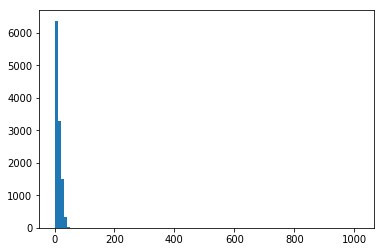

In [23]:
plt.hist(type_1['type 1'] , bins = 100);

In [24]:
type_1[type_1['type 1'] == 0 ].shape

(3636, 9)

# LOG

In [71]:
# remove 0
pp_type_1 = type_1['type 1'].copy()
pp_type_1.drop(type_1[type_1['type 1'] == 0 ].index , inplace=True)

In [70]:
pp_type_1.mean()

7.982313153788321

In [72]:
type_1_log = np.log(pp_type_1)
#type_1_log = type_1_log.replace(type_1_log[0], 0)
type_1_log.skew()

-1.2327569575485604

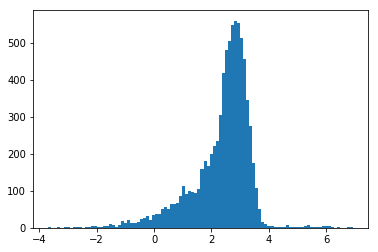

In [73]:
plt.hist(type_1_log , bins = 100);

In [ ]:
type_1['type 1'].update(type_1_log)

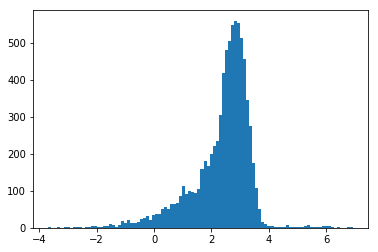

In [76]:
type_1.drop(type_1[type_1['type 1'] == 0 ].index , inplace=True)
plt.hist(type_1['type 1'] , bins = 100);

In [69]:
box_type_1 , maxlog = stats.boxcox(pp_type_1)
pp_type_1.update(pd.Series(box_type_1))
pp_type_1.skew()

27.621578074759324

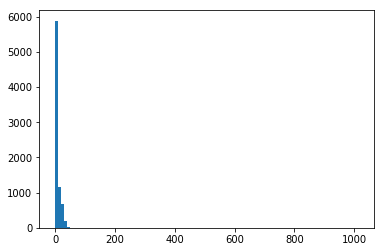

In [47]:
plt.hist(pp_type_1, bins = 100);

In [49]:
type_1['type 1'].max()

1015.73

In [ ]:
counting = type_1_no_zero.groupby('type 1').count()['age']
counting

In [18]:
lower = type_1_no_zero[type_1_no_zero['type 1'] < 40]

In [ ]:
lower.skew()

In [20]:
profile_amount = lower.copy()

In [ ]:
w = 3
n = math.ceil((type_1_amount['type 1'].max() - type_1_amount['type 1'].min())/w)
plt.hist(type_1_amount['type 1'] , bins = n);

# types split

In [37]:
profile_amount.shape

(14825, 9)

In [10]:
type_1_min = profile_amount[profile_amount['type 1'] != 0].min()['type 1']
type_2_min = profile_amount[profile_amount['type 2'] != 0].min()['type 2']
type_3_min = profile_amount[profile_amount['type 3'] != 0].min()['type 3']
no_offer_min = profile_amount[profile_amount['no offer'] != 0].min()['no offer']
print( type_1_min , type_2_min , type_3_min , no_offer_min)

0.025 0.025 0.04 0.15


In [13]:
profile_amount['type 1'].replace(0 , type_1_min , inplace = True)
profile_amount['type 2'].replace(0 , type_2_min , inplace = True)
profile_amount['type 3'].replace(0 , type_3_min , inplace = True)
profile_amount['no offer'].replace(0 , no_offer_min , inplace = True)
profile_amount.head()

,age,income,F,M,O,type 1,type 2,type 3,no offer
0,55,112000.0,1,0,0,23.220000,0.025000,11.072285,26.895000
1,75,100000.0,1,0,0,20.805000,0.025000,11.072285,23.532000
2,68,70000.0,0,1,0,18.420000,0.025000,9.210000,19.655000
3,65,53000.0,0,1,0,9.107500,1.644662,13.445000,12.757833
4,58,51000.0,0,1,0,10.385967,0.025000,3.570000,2.826667


In [15]:
profile_amount.skew(axis = 0, skipna = True)

age         -0.080766
income       0.402005
F            0.351654
M           -0.292205
O            8.182744
type 1      19.383088
type 2      42.839502
type 3      17.362723
no offer    11.003149
dtype: float64

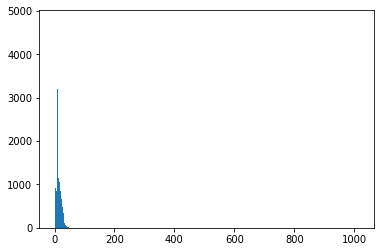

In [14]:
type_1 = profile_amount.sort_values("type 1", axis = 0, ascending = True).reset_index()

w = 3
n = math.ceil((type_1['type 1'].max() - type_1['type 1'].min())/w)
plt.hist(type_1['type 1'] , bins = n);

In [16]:
type_1_log = np.log(type_1['type 1'])
type_1_log = type_1_log.replace(type_1_log[0], 0)
type_1_log.skew()

-0.3804147777370865

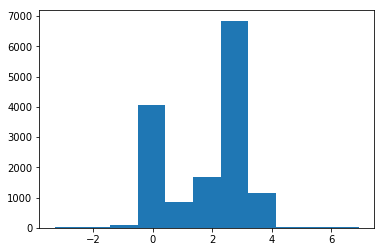

In [17]:
w = 1
n = math.ceil((type_1_log.max() - type_1_log.min())/w)
plt.hist(type_1_log , bins = n);

In [18]:
type_1_boxcox = stats.boxcox(type_1['type 1'])[0]
type_1_boxcox_series = pd.Series(type_1_boxcox)
type_1_boxcox_series.skew()

-0.2732165786843898

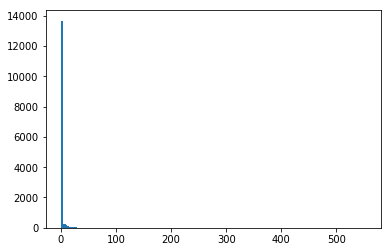

In [33]:
type_2 = profile_amount.sort_values("type 2", axis = 0, ascending = True).reset_index()
w = 3
n = math.ceil((type_1['type 2'].max() - type_1['type 2'].min())/w)
plt.hist(type_2['type 2'] , bins = n);

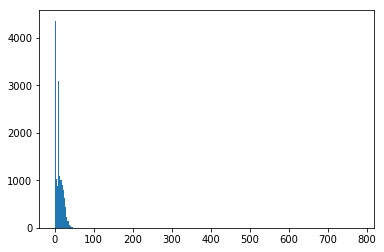

In [34]:
type_3 = profile_amount.sort_values("type 3", axis = 0, ascending = True).reset_index()
w = 3
n = math.ceil((type_1['type 3'].max() - type_1['type 3'].min())/w)
plt.hist(type_3['type 3'] , bins = n);

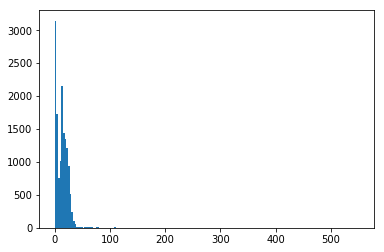

In [35]:
type_4 = profile_amount.sort_values("no offer", axis = 0, ascending = True).reset_index()
w = 3
n = math.ceil((type_1['no offer'].max() - type_1['no offer'].min())/w)
plt.hist(type_4['no offer'] , bins = n);

In [ ]:
#profile_amount['income'].round(0).astype(int)
#profile_amount.dtypes

# Bucketize

In [21]:
age_np = profile_amount['age'].values.reshape(-1,1) #returns a numpy array
income_np = profile_amount['income'].values.reshape(-1,1)

age_bucketizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform').fit(age_np)
income_bucketizer = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy='uniform').fit(income_np)

age_pp = age_bucketizer.transform(age_np)
income_pp = income_bucketizer.transform(income_np)

#age_bucketizer.bin_edges_
profile_amount['age'] = age_pp
profile_amount['income'] = income_pp

profile_amount.head()

,age,income,F,M,O,type 1,offers type 1,viewed type 1,completed type 1
0,5.0,7.0,1,0,0,21.0,2.0,2.0,2.0
1,4.0,4.0,0,1,0,18.0,1.0,1.0,1.0
2,4.0,2.0,0,1,0,9.0,4.0,4.0,3.0
3,4.0,2.0,1,0,0,12.0,2.0,2.0,2.0
8,4.0,7.0,0,1,0,16.0,2.0,2.0,1.0


In [6]:
profile_amount.dtypes

age         float64
income      float64
F             int64
M             int64
O             int64
type 1      float64
type 2      float64
type 3      float64
no offer    float64
dtype: object

# Normalize

In [13]:
type_np = profile_amount[['type 1','type 2','type 3','no offer' ]].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
type_scaled = min_max_scaler.fit_transform(type_np)

profile_amount[['type 1','type 2','type 3','no offer' ]] = type_scaled

profile_amount.head()

,age,income,F,M,O,type 1,type 2,type 3,no offer
0,3.0,8.0,1,0,0,0.022860,0.000000,0.014209,0.048582
1,5.0,7.0,1,0,0,0.020483,0.000000,0.014209,0.042473
2,4.0,4.0,0,1,0,0.018135,0.000000,0.011819,0.035430
3,4.0,2.0,0,1,0,0.008966,0.002977,0.017254,0.022902
4,3.0,2.0,0,1,0,0.010225,0.000000,0.004581,0.004862


In [14]:
profile_amount.dtypes

age         float64
income      float64
F             int64
M             int64
O             int64
type 1      float64
type 2      float64
type 3      float64
no offer    float64
dtype: object

# SPLIT DATA  : TEST -TRAIN

In [62]:
profile_amount = profile_amount[profile_amount['type 1'] != 0 ]

In [63]:
profile_amount.skew(axis = 0, skipna = True)

age         -0.043636
income       0.297180
F            0.196142
M           -0.133746
O            7.861946
type 1      17.991864
type 2      38.421789
type 3      16.769668
no offer    10.761038
dtype: float64

In [77]:
profile_amount = type_1.copy()

In [78]:
profile_amount.head()

,age,income,F,M,O,type 1,offers type 1,viewed type 1,completed type 1
0,75,100000.0,1,0,0,3.035193,2.0,2.0,2.0
1,68,70000.0,0,1,0,2.913437,1.0,1.0,1.0
2,65,53000.0,0,1,0,2.209098,4.0,4.0,3.0
3,61,57000.0,1,0,0,2.521319,2.0,2.0,2.0
5,49,52000.0,0,1,0,4.694096,1.0,1.0,1.0


In [79]:
X = profile_amount.drop(columns = ['type 1'])
y = profile_amount['type 1']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# boxcox

In [24]:
y_train.head()

8161    26.0
2349     3.0
444     26.0
5217     8.0
7697    14.0
Name: type 1, dtype: float64

In [ ]:
y_train_pp , maxlog = stats.boxcox(y_train)
y_train.update(pd.Series(y_train_pp))
y_train.head()

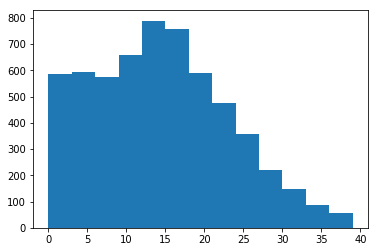

In [26]:
w = 3
n = math.ceil((y_train.max() - y_train.min())/w)
plt.hist(y_train , bins = n);

In [27]:
y_train.skew()

0.38197036350162594

# LINEAR REGRESSION

In [ ]:
from sklearn import linear_model

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train , y_train)

In [ ]:
predictions_lr = lm.predict(X_test)

In [ ]:
for i in range(len(predictions_lr)):
    print("X=%s" % ((y_test.values[i][0] - predictions_lr[i][0])))

In [ ]:
lm.coef_

# Pipeline

In [ ]:
pipeline = Pipeline([
        ('prep' , preprocessing.MinMaxScaler()),          
        ('clf' , MultiOutputClassifier(RandomForestRegressor()))
    ])

# OTHER

In [29]:
import gensim
import re
import pickle

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
        #('vect' , CountVectorizer()),
        #('tfidf' , TfidfTransformer()),             
        ('clf' , MultiOutputClassifier(RandomForestRegressor()))
    ])

In [ ]:
pipeline = Pipeline([
        #('vect' , CountVectorizer()),
        #('tfidf' , TfidfTransformer()),             
        ('clf' , RandomForestClassifier())
    ])

In [ ]:
X = profile_amount.drop(columns = ['type 1', 'type 2', 'type 3'])
y = profile_amount['type 1']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)

In [ ]:
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X_train, Y_train)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

In [ ]:
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

# fit final model
model = LogisticRegression()
model.fit(X_train, Y_train)

# make a prediction
ynew = model.predict(X_test)
# show the inputs and predicted outputs
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test[i], ynew[i]))

In [ ]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(X_train)

In [ ]:
print(utils.multiclass.type_of_target(trainingScores))
>>> continuous

print(utils.multiclass.type_of_target(trainingScores.astype('int')))
>>> multiclass

print(utils.multiclass.type_of_target(encoded))
>>> multiclass

# SVC

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [16]:
#X = profile_amount.drop(columns = ['type 1', 'type 2', 'type 3','no offer'])
#y = profile_amount[['type 1']]

#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
y_train.head()

8161    26.0
2349     3.0
444     26.0
5217     8.0
7697    14.0
Name: type 1, dtype: float64

In [81]:
clf = make_pipeline(SVR())
clf.fit(X_train, y_train)

Pipeline(steps=[('svr', SVR())])

In [82]:
predictions = clf.predict(X_test)

In [141]:
#predictions_full = inv_boxcox(predictions, maxlog)

In [ ]:
#predictions_full

In [83]:
y_test.head()

11509    2.659560
8401     1.718292
12060    1.306981
9229    -0.673345
9218     2.323368
Name: type 1, dtype: float64

In [84]:
for i in range(len(y_test)):
    print("X=%s , prediction=%s" % ((y_test.values[i] , predictions[i])))

X=2.659559991941776 , prediction=2.4372091928602604
X=1.7182923173461826 , prediction=1.9982558474893488
X=1.3069805544001651 , prediction=2.7125917344583605
X=-0.6733445532637656 , prediction=1.998327189991822
X=2.3233676321765744 , prediction=2.811012877949722
X=3.2472688993694185 , prediction=3.138120998400562
X=2.0592388343623163 , prediction=2.510962897156264
X=2.5858825671280026 , prediction=2.142379168055621
X=0.4134332777573411 , prediction=1.8207415351382064
X=1.0818051703517284 , prediction=2.581525649004763
X=0.7701082216960737 , prediction=2.0564941229237426
X=3.1285133847878095 , prediction=2.6488032090882663
X=2.1294214739848565 , prediction=1.6720209038249294
X=2.305081973192633 , prediction=2.3603951757276396
X=2.281701882077622 , prediction=3.0272275493968817
X=1.958685340544036 , prediction=1.6425102253975998
X=3.4326960487215263 , prediction=3.116338360665048
X=0.34358970439007686 , prediction=1.9982894346736733
X=2.703037659278666 , prediction=2.864973485512769
X=3.

In [85]:
from sklearn.metrics import confusion_matrix
import statistics

In [86]:
#labels = np.unique(predictions)
#confusion_mat = confusion_matrix(y_test.values, predictions, labels=labels)
accuracy_lst = []
for i in range(len(y_test)):
    accuracy_lst.append(y_test.values[i] - predictions[i])

#print("Labels:", labels)
#print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", statistics.mean(accuracy_lst))

Accuracy: -0.20352541468045346
